## **Hotel Booking EDA**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hotels = pd.read_csv('hotel_booking.csv')
hotels.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


### **Basic Information of Dataset**

In [3]:
print(hotels.shape)
print(hotels.columns)

(119390, 36)
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')


In [4]:
print(hotels.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### *Summary Statistics*

In [5]:
# summary statisctcs, describe
print(hotels.describe())

         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000            

### *Handling Missing Values*

In [6]:
#Before
print(hotels.isna().sum().sort_values(ascending=False))

company                           112593
agent                              16340
country                              488
children                               4
arrival_date_year                      0
lead_time                              0
is_canceled                            0
hotel                                  0
stays_in_weekend_nights                0
stays_in_week_nights                   0
arrival_date_day_of_month              0
arrival_date_month                     0
babies                                 0
meal                                   0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
adults                                 0
arrival_date_week_number               0
reserved_room_type                     0
previous_bookings_not_canceled         0
booking_changes                        0
assigned_room_type                     0
deposit_type    

In [7]:
hotels[['children', 'agent', 'company']] = hotels[['children', 'agent', 'company']].fillna(0.0).astype(int)

In [8]:
hotels['country'].fillna('N/A',inplace=True)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_26544\899832573.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hotels['country'].fillna('N/A',inplace=True)


In [9]:
#After
print(hotels.isna().sum().sort_values(ascending=False))

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

## **Analysis and Visualization**

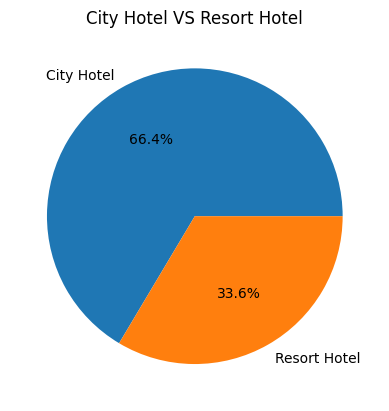

In [10]:
cit_res = hotels.groupby('hotel')['hotel'].count()
cit_res.plot(kind='pie',rot=0, autopct='%1.1f%%')
plt.title("City Hotel VS Resort Hotel")
plt.ylabel("")
plt.show()

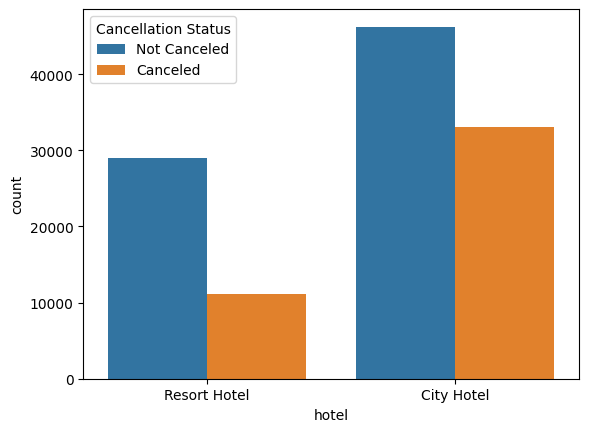

In [11]:
sns.countplot(data=hotels, x='hotel', hue='is_canceled')
plt.legend(title='Cancellation Status', labels=['Not Canceled', 'Canceled'])
plt.show()

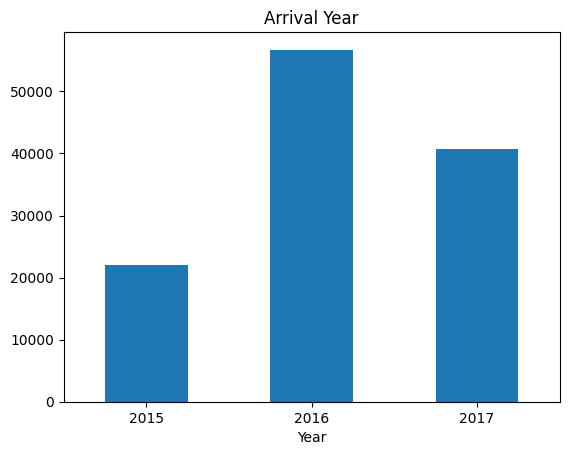

In [61]:
year = hotels.groupby('arrival_date_year')['hotel'].count()
year.plot(kind='bar',rot=0,title='Arrival Year')
plt.xlabel('Year')
plt.show()

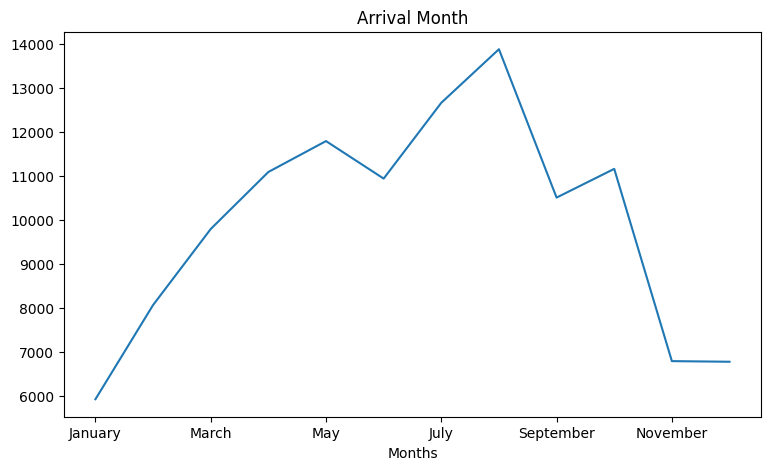

In [69]:
plt.figure(figsize=(9, 5))
month = hotels.groupby('arrival_date_month')['hotel'].count()

new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October', 'November', 'December']

months_sort = hotels['arrival_date_month'].value_counts().reindex(new_order)

months_sort.plot(kind='line',title='Arrival Month')
plt.xlabel('Months')
plt.show()

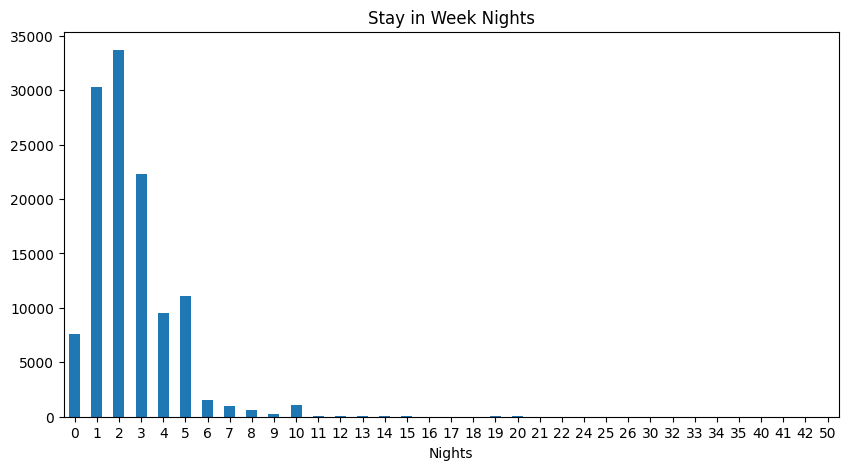

In [14]:
plt.figure(figsize=(10, 5))
weeknight = hotels.groupby('stays_in_week_nights')['hotel'].count()
#print(weeknight)
weeknight.plot(kind='bar',rot=0,title='Stay in Week Nights',xlabel='Nights')
plt.show()

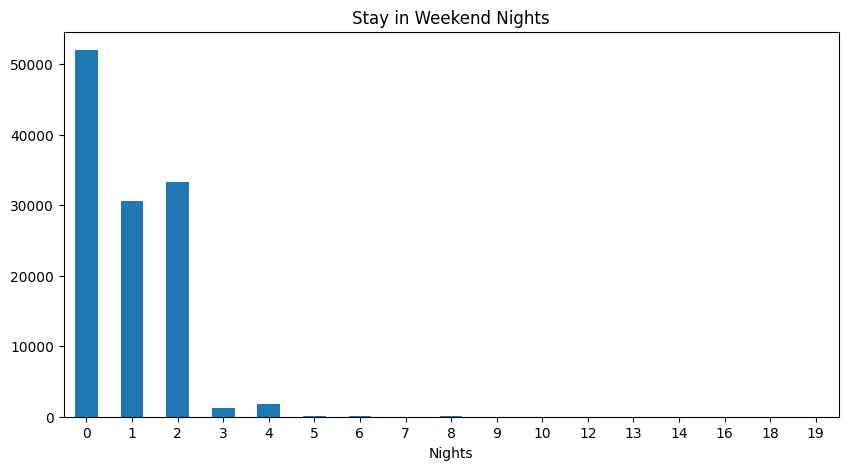

In [51]:
plt.figure(figsize=(10, 5))
weekendnight = hotels.groupby('stays_in_weekend_nights')['hotel'].count()
#print(weekendnight)
weekendnight.plot(kind='bar',rot=0,title='Stay in Weekend Nights',xlabel='Nights')
plt.show()

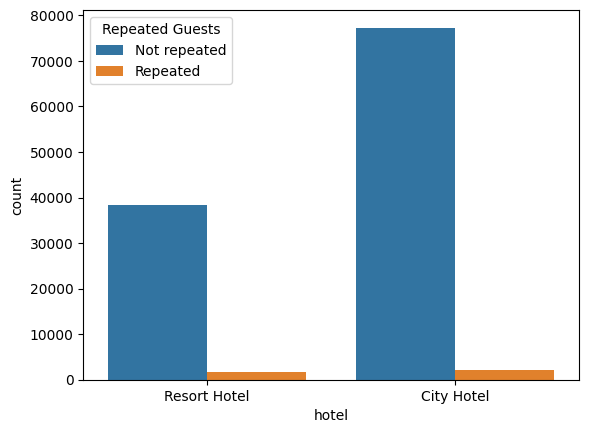

In [16]:
sns.countplot(data=hotels, x='hotel', hue='is_repeated_guest')
plt.legend(title='Repeated Guests', labels=['Not repeated', 'Repeated'])
plt.show()

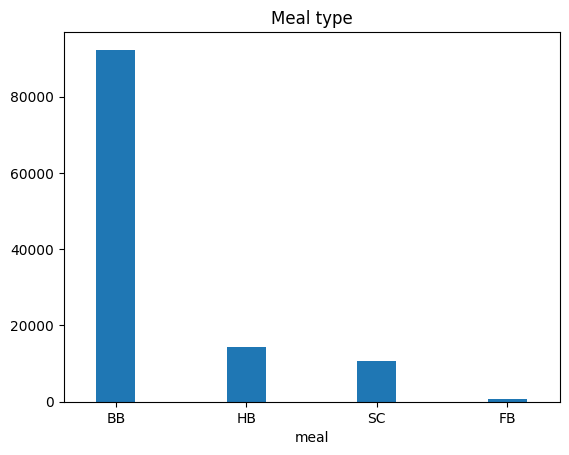

In [38]:
temp = hotels[hotels['meal'] != 'Undefined']
meal = temp['meal'].value_counts()
meal.plot(kind='bar',rot=0,title='Meal type', width= 0.3)
plt.show()

country
DEU     7287
ESP     8568
FRA    10415
GBR    12129
PRT    48590
Name: hotel, dtype: int64


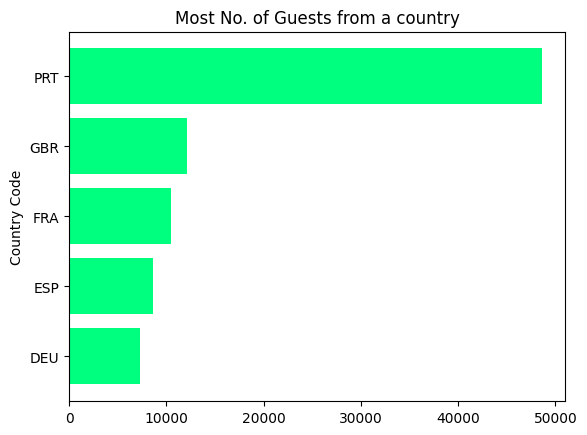

In [66]:
coun = hotels.groupby('country')['hotel'].count()
country = coun[coun > 5000]

print(country.sort_values())
#country.plot(kind='bar',color='green',rot=0,xlabel='Country')
plt.barh(country.index,country.values,color='springgreen')
plt.title('Most No. of Guests from a country')
plt.ylabel('Country Code')
plt.show()

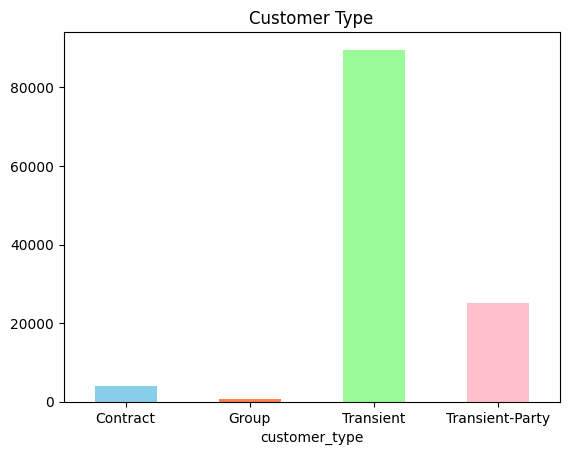

In [68]:
customer = hotels.groupby('customer_type')['hotel'].count()
customer.plot(kind='bar',rot=0,color=['skyblue','coral','palegreen','pink'],title='Customer Type')
plt.show()

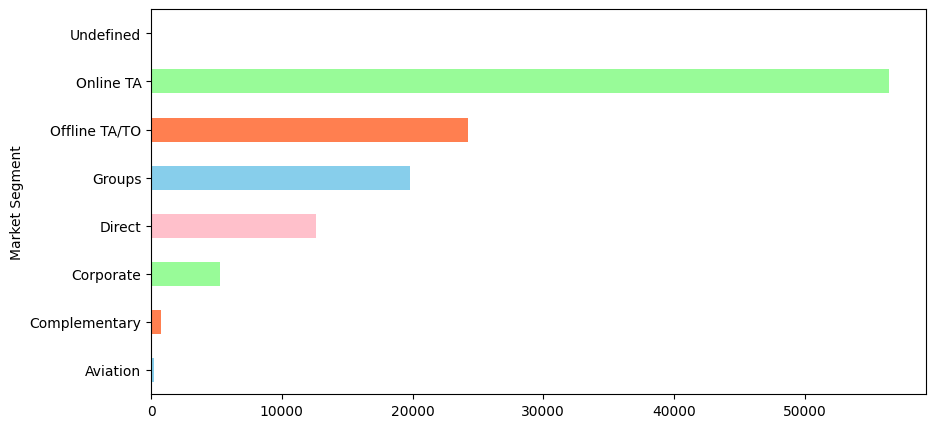

In [59]:
plt.figure(figsize=(10, 5))
market = hotels.groupby('market_segment')['hotel'].count()
market.plot(kind='barh',rot=0,color=['skyblue','coral','palegreen','pink'],ylabel='Market Segment')
plt.show()